In [71]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


# Import


In [2]:
import copy  # copy big/deep objects by value
import csv
import datetime  # datetime operations
import itertools  # operate with iterators
import json  # read/write from/into json format
import math
import os  # OS operations (read/write files/folders)
import sys
import time
import warnings  # hide warnings
from collections import Counter
from itertools import groupby
import matplotlib

# process parallelization
from multiprocessing import Manager, Pool, RawArray, cpu_count
from os.path import exists

import matplotlib.pyplot as plt  # mother of plots focr Python

# import mlxtend
import numpy as np  # array/matrix operations (e.g. linear algebra)
import pandas as pd  # operate with dataframes
import pyxdf  # read XDF files (LSL streams recordings)

import scipy.stats
import seaborn as sns  # matplotlib plotting nice with shortcuts
from IPython.display import Markdown, display  # print nicely
from ipywidgets import IntProgress
#from matplotlib.pyplot import cm
from scipy.signal import savgol_coeffs
from tqdm.notebook import tqdm, trange  # mother of progressbars
from scipy.stats import ks_2samp
from multiprocessing import Pool, cpu_count

import scipy.signal

In [3]:
# inline static plotting (default)
%matplotlib inline
# interactive plotting
# %matplotlib widget

# progress bar customized format
B_FORMAT = """📄 {n_fmt} of {total_fmt} {desc} processed: {bar} 
            {percentage:3.0f}% ⏱️{elapsed} ⏳{remaining} ⚙️{rate_fmt}{postfix}"""


CORES = cpu_count()  # number of cpu threads for multiprocessing
print(f"Total CPU threads: {CORES}")


def pbar_fork_hack():
    """
    Hack to enforce progress bars to be displayed by fork processes on
    IPython Apps like Jupyter Notebooks.

    Avoids [IPKernelApp] WARNING | WARNING: attempted to send message from fork

    Important: pass this function as argument for the initializer parameter
    while initializing a multiprocessing pool to make it work. E.g.:

    pool = Pool(processes=N_CORES, initializer=pbar_fork_hack)

    Source:
     - https://github.com/ipython/ipython/issues/11049#issue-306086846
     - https://github.com/tqdm/tqdm/issues/485#issuecomment-473338308
    """
    print(" ", end="", flush=True)

Total CPU threads: 8


In [4]:
DATA_PATH = "E:/WestbrookProject/SpaRe_Data/control_data/pre-processing_2023/step1_preparation"

savepath = "E:/WestbrookProject/SpaRe_Data/control_data/pre-processing_2023/analysis_duplicates"


In [5]:
# Participant list of all participants that participated 5 sessions x 30 min
# in Westbrook city
PartList = [1004, 1005, 1008, 1010, 1011, 1013, 1017, 1018, 1019, 1021, 1022, 1023, 1054, 1055, 1056, 1057, 1058, 1068, 1069, 1072, 1073, 1074, 1075, 1077, 1079, 1080]
print(len(PartList),'participants') 

26 participants


In [5]:
# PartList = [1004]

# Processing

In [6]:
# Convert the Unix timestamps to datetime objects
def convertTimeStamp(dataCTS):
    
    dataCTS['timeStampDataPointStart_converted'] = dataCTS['timeStampDataPointStart'] - dataCTS.loc[0,'timeStampDataPointStart']

In [7]:
def checkDuplicates(data2check, columns_to_check):
    
    if(len(columns_to_check) == 1):
        
        repeatedRows = data2check[columns_to_check].diff().eq(0).all(axis=1)
        
    else:
        # Check if differences between consecutive rows are consistently 0 for the selected columns
    
        # first create df with differences within each column - compare each row with the next
        diffDF = data2check[columns_to_check].diff()

        # then check, if there are 0 differences (doublicates) in all columns
        repeatedRows = diffDF.eq(0).all(axis=1)
    
    return repeatedRows

In [6]:
# # test code - load file

# file= "1004_Session_5_ET_1_data_prepared.csv"
# data = pd.read_csv(os.path.join(DATA_PATH, file))


In [35]:
# dataShort = data.head(20).copy()

# # dataShort.loc[3:12, dataShort.columns[3:10]] = 4


In [51]:
# a = np.array([[[1, 2, 3], [4, 5, 6], [7, 8, 9]],
#     [[10, 11, 12], [13, 14, 15], [16, 17, 18]],
#     [[19, 20, 21], [22, 23, 24], [25, 26, 27]]])

# b = a[:,0:2]

# # print(b)
# df = pd.DataFrame(columns=['A', 'B'])

# df = df.append({'A': 2 * 2, 'B': 2 * 3}, ignore_index = True)
# df = df.append({'A': 2 * 2, 'c': 2 * 3}, ignore_index = True)

# df = df.append({'E': a}, ignore_index = True)
# df = df.append({'E': b}, ignore_index = True)

# print(df.iloc[1,3])

In [52]:
# # df = pd.DataFrame({'col1': [1, 3, 3, 4, 4, 5,6,6]})


# df = pd.DataFrame({'col1': [1, 3, 3, 4, 4, 5,6,6],
#                    'col2': [2, 30, 30, 400,400,50,6,6],
#                    'col3': [3, 1, 4, 3,3,5,6,6]})


# print(df.columns[0])
# print(checkDuplicates(df,df.columns[0:1]).sum())

# # # df['diff1'] = df['col1'].diff()
# # # df['diff2'] = df['col2'].diff()
# # # df['diff3'] = df['col3'].diff()

# # cols= df.columns[0:3]

# # print(cols)

# # # df['diffAll']= df[cols].diff(axis=1).fillna(0).eq(0).all(axis=1)

# # # df.head(10)

# # testiDF = df.copy()

# # columns_to_check = df.columns[0:3]

# # helperDF2 = pd.DataFrame()


# # helperDF2 = df[columns_to_check].diff()

# # columns1 = helperDF2.columns[0:3]

# # helper3 = helperDF2.eq(0).all(axis=1)
# # # for idx, col in enumerate(columns_to_check):
# # #     print(col)
# # #     helperDF[col] = testiDF[col].diff()
    
# # # helperDF['allDiff']= helperDF[:].diff(axis=1)
# # # print(helper3)

# # helper4 = pd.concat([df,helperDF2], axis = 1)
# # helper4['allDiff'] = helper3

# # print(helper4['allDiff'].sum())



# # helper5 = checkDuplicates(df, columns_to_check)
# # helper4['newDiff'] = helper5
# # helper4.head(10)

In [53]:
# sns.set_theme()
# a =  np.array([[[1, 2, 3], [4, 5, 6], [7, 8, 9]],
#                 [[10, 11, 12], [13, 14, 15], [16, 17, 18]],
#                 [[19, 20, 21], [22, 23, 24], [25, np.nan, 27]]])

# b = np.array([[[100, 200, 300], [400, 500, 600], [700, 800, 900]]])
# # b_expanded = np.expand_dims(b, axis=3)
# # print(a)
# # print('----------')
# # print(b)
# c = np.concatenate((a,b),axis=0)
# print('----------')

# print(c[:,0,0])

# print(np.mean(c[:,0,:]))

# d = np.zeros([4,4])
# print(d)

# f, ax = plt.subplots(figsize=(9, 6))
# sns.heatmap(a[2,:,:], annot=True, fmt=".1f", linewidths=.5, ax=ax, cmap = "viridis")


In [54]:
# a = np.array([0,0,1,0,0,0])
# b = np.array([0,0,1,1,0,0])

# c = ~(a==b)
# print(sum(c))
# # c = [a,b]
# # print(c)

# # dataLen = len(data)
# # eyeVars =  data.columns[3:10]
# # check if vars are correctly selected
# # for column_name in enumerate(eyeVars):
# #     print(column_name)
    


eye vars sum duplicates percentage 0.5147473368742768
--------------------
unity vars sum duplicates percentage 0.429824040829649
--------------------
eye unity combination vars sum duplicates percentage 0.429824040829649
--------------------
start TS 0.0
end TS 0.4295124773745586
verbose TS 0.0
--------------------


D:\Software\Programme\Anaconda3\envs\graphs\lib\site-packages\ipykernel_launcher.py:92: RuntimeWarning: divide by zero encountered in long_scalars
D:\Software\Programme\Anaconda3\envs\graphs\lib\site-packages\ipykernel_launcher.py:92: RuntimeWarning: invalid value encountered in long_scalars


[[3.4695e+04 5.7240e+03 5.7240e+03 3.4695e+04 5.7450e+03 3.4695e+04]
 [5.7240e+03 2.8971e+04 0.0000e+00 2.8971e+04 2.1000e+01 2.8971e+04]
 [5.7240e+03 0.0000e+00 2.8971e+04 2.8971e+04 2.1000e+01 2.8971e+04]
 [3.4695e+04 2.8971e+04 2.8971e+04 0.0000e+00 2.8950e+04 0.0000e+00]
 [5.7450e+03 2.1000e+01 2.1000e+01 2.8950e+04 2.8950e+04 2.8950e+04]
 [3.4695e+04 2.8971e+04 2.8971e+04 0.0000e+00 2.8950e+04 0.0000e+00]]
[[5.14747337e-01 1.64980545e-01 1.64980545e-01 1.00000000e+00
  1.65585819e-01 1.00000000e+00]
 [1.97576887e-01 4.29824041e-01 0.00000000e+00 1.00000000e+00
  7.24862794e-04 1.00000000e+00]
 [1.97576887e-01 0.00000000e+00 4.29824041e-01 1.00000000e+00
  7.24862794e-04 1.00000000e+00]
 [           inf            inf            inf 0.00000000e+00
             inf            nan]
 [1.98445596e-01 7.25388601e-04 7.25388601e-04 1.00000000e+00
  4.29512477e-01 1.00000000e+00]
 [           inf            inf            inf            nan
             inf 0.00000000e+00]]


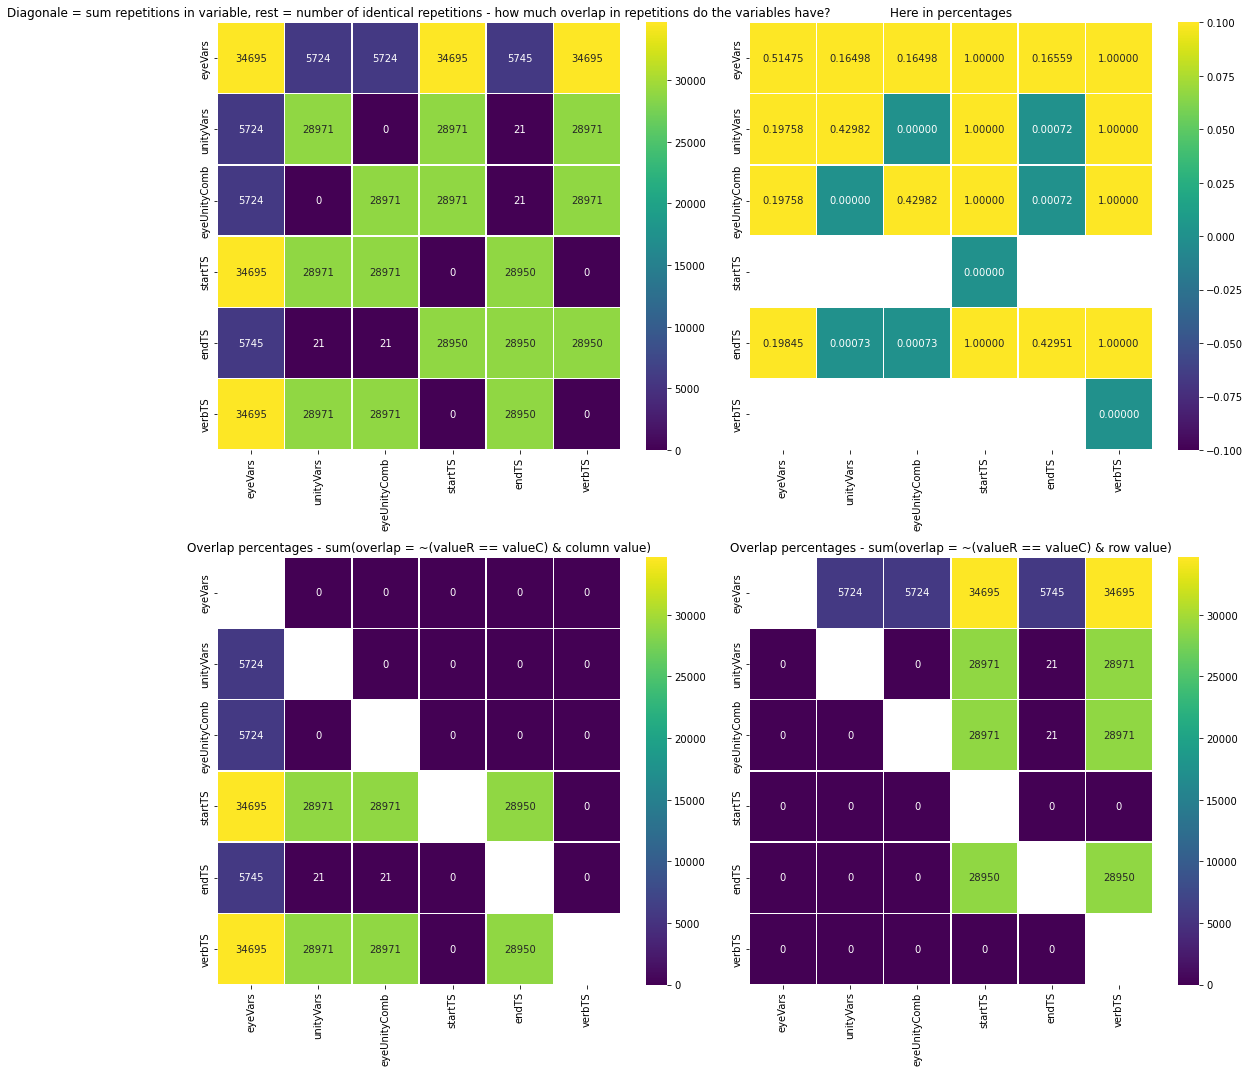

In [50]:
# test code - apply functions

# data = convertTimeStamp(data)

dupl_df = pd.DataFrame(columns=['Participant', 
                                'Session', 
                                'ETSess', 
                                'dataLength', 
                                'eyeVars_dupl', 
                                'unityVars_dupl',
                                'eyeUnityComb_dupl',
                                'startTS_dupl',
                                'endTS_dupl',
                                'verbTS_dupl',
                                'matrix'])
dataLen = len(data)
eyeVars =  data.columns[3:10]
# check if vars are correctly selected
# for column_name in enumerate(eyeVars):
#     print(column_name)
    
eyeVars_dupl= checkDuplicates(data, eyeVars)

print('eye vars sum duplicates percentage', sum(eyeVars_dupl)/len(data))
print('--------------------')

unityVars = data.columns[37:79]
# check if vars are correctly selected
# for column_name in enumerate(unityVars):
#     print(column_name)
    
unityVars_dupl = checkDuplicates(data, unityVars)
print('unity vars sum duplicates percentage', sum(unityVars_dupl)/len(data))
print('--------------------')

eyeUnityComb = data.columns[10:37]
# check if vars are correctly selected
# for column_name in enumerate(eyeUnityComb):
#     print(column_name)
eyeUnityComb_dupl = checkDuplicates(data, eyeUnityComb)
print('eye unity combination vars sum duplicates percentage', sum(eyeUnityComb_dupl)/len(data))
print('--------------------')


startTS_dupl = checkDuplicates(data, data.columns[0:1])
endTS_dupl = checkDuplicates(data, data.columns[1:2])
verbTS_dupl = checkDuplicates(data, data.columns[2:3])

print('start TS', sum(startTS_dupl)/dataLen)
print('end TS', sum(endTS_dupl)/dataLen)
print('verbose TS', sum(verbTS_dupl)/dataLen)

print('--------------------')

# create matrix with combinations of duplocate values
dupl_list_sum = [sum(eyeVars_dupl), sum(unityVars_dupl), sum(eyeUnityComb_dupl),sum(startTS_dupl),sum(endTS_dupl),sum(verbTS_dupl)]
dupl_list_bools = [eyeVars_dupl, unityVars_dupl, eyeUnityComb_dupl,startTS_dupl,endTS_dupl,verbTS_dupl]
dupl_arr_nr = np.zeros([len(dupl_list_sum), len(dupl_list_sum)])
dupl_arr_p = np.zeros([len(dupl_list_sum), len(dupl_list_sum)])
dupl_arr_p2 = np.zeros([len(dupl_list_sum), len(dupl_list_sum)])
dupl_arr_p3 = np.zeros([len(dupl_list_sum), len(dupl_list_sum)])

for indexR in range(len(dupl_list_sum)):
    
    for indexC in range(len(dupl_list_sum)):
        
        # if condition to handle the diagonale
        if indexR == indexC:
            dupl_arr_nr[indexR, indexC] = dupl_list_sum[indexR]
            dupl_arr_p[indexR, indexC] = dupl_list_sum[indexR]/dataLen
            dupl_arr_p2[indexR, indexC] = np.nan
            dupl_arr_p3[indexR, indexC] = np.nan
            
        else:
            valueR = np.array(dupl_list_bools[indexR])
            valueC = np.array(dupl_list_bools[indexC])
            
            overlap = ~(valueR == valueC)
            
            oandvR = overlap & valueR
            oandvC = overlap & valueC
            
#             print([indexR, indexC])
#             print('o and vR ' ,sum(oandvR))
#             print('o and vC ', sum(oandvC))
            
            dupl_arr_nr[indexR, indexC] = sum(overlap)
            
#             if(indexR > indexC):
            dupl_arr_nr[indexR, indexC] = sum(overlap)

            dupl_arr_p[indexR, indexC] = sum(overlap)/dupl_list_sum[indexR]
        
            dupl_arr_p2[indexR, indexC] = sum(oandvC)

            dupl_arr_p3[indexR, indexC] = sum(oandvR)
            
#             if(indexR < indexC):
                
#                 dupl_arr_nr[indexR, indexC] = sum(overlap)
                
#                 dupl_arr_p[indexR, indexC] = sum(overlap)/dupl_list_sum[indexC]
                
#                 dupl_arr_p2[indexR, indexC] = sum(oandvC)

print(dupl_arr_nr)
print(dupl_arr_p)

f, ax = plt.subplots(nrows=2, ncols=2, figsize=(15,15))
sns.heatmap(dupl_arr_nr, annot=True, fmt=".0f", linewidths=.5, ax=ax[0,0], cmap = "viridis",
            xticklabels=['eyeVars', 'unityVars', 'eyeUnityComb','startTS','endTS','verbTS'],  # Specify x-axis labels
            yticklabels=['eyeVars', 'unityVars', 'eyeUnityComb','startTS','endTS','verbTS'])               
                
ax[0,0].set_title('Diagonale = sum repetitions in variable, rest = number of identical repetitions - how much overlap in repetitions do the variables have?')

sns.heatmap(dupl_arr_p, annot=True, fmt=".5f", linewidths=.5, ax=ax[0,1], cmap = "viridis",
            xticklabels=['eyeVars', 'unityVars', 'eyeUnityComb','startTS','endTS','verbTS'],  # Specify x-axis labels
            yticklabels=['eyeVars', 'unityVars', 'eyeUnityComb','startTS','endTS','verbTS'])               
ax[0,1].set_title('Here in percentages')  

sns.heatmap(dupl_arr_p2, annot=True, fmt=".0f", linewidths=.5, ax=ax[1,0], cmap = "viridis",
            xticklabels=['eyeVars', 'unityVars', 'eyeUnityComb','startTS','endTS','verbTS'],  # Specify x-axis labels
            yticklabels=['eyeVars', 'unityVars', 'eyeUnityComb','startTS','endTS','verbTS'])               
ax[1,0].set_title('Overlap percentages - sum(overlap = ~(valueR == valueC) & column value)')

sns.heatmap(dupl_arr_p3, annot=True, fmt=".0f", linewidths=.5, ax=ax[1,1], cmap = "viridis",
            xticklabels=['eyeVars', 'unityVars', 'eyeUnityComb','startTS','endTS','verbTS'],  # Specify x-axis labels
            yticklabels=['eyeVars', 'unityVars', 'eyeUnityComb','startTS','endTS','verbTS'])               
ax[1,1].set_title('Overlap percentages - sum(overlap = ~(valueR == valueC) & row value)') 


# Adjust layout and display the plot
plt.tight_layout()


# save plot

# Save the plot to the specified directory
save_file = os.path.join(savepath, 'exampleFile_AnalyseRepetitionsDouplicates.png')
plt.savefig(save_file, format='png')

plt.show()




##########################################################################################################################
# dupl_df = dupl_df.append({'Participant':1004, 
#                         'Session':1, 
#                         'ETSess':1, 
#                         'dataLength':dataLen, 
#                         'eyeVars_dupl': eyeVars_dupl, 
#                         'unityVars_dupl': unityVars_dupl,
#                         'eyeUnityComb_dupl': eyeUnityComb_dupl,
#                         'startTS_dupl': startTS_dupl,
#                         'endTS_dupl': endTS_dupl,
#                         'verbTS_dupl': verbTS_dupl}, 
#                         ignore_index = True)

# dupl_df.head()

# allEU_dupl = eyeVars_dupl & unityVars_dupl & eyeUnityComb_dupl
# print(sum(allEU_dupl)/len(data))


# timeDiff_startTS = data['timeStampDataPointStart'].diff()
# print('--------start time stamp - sampling rate at duplicate rows ------------')
# print(1/np.nanmin(timeDiff_startTS[allEU_dupl]))
# print(1/np.nanmax(timeDiff_startTS[allEU_dupl]))
# print(1/np.nanmean(timeDiff_startTS[allEU_dupl]))
# print(1/np.nanmedian(timeDiff_startTS[allEU_dupl]))


# timeDiff_verboseTS = data['timeStampGetVerboseData'].diff()
# print('--------verbose time stamp - sampling rate at duplicate rows ------------')
# print(1/np.nanmin(timeDiff_verboseTS[allEU_dupl]))
# print(1/np.nanmax(timeDiff_verboseTS[allEU_dupl]))
# print(1/np.nanmean(timeDiff_verboseTS[allEU_dupl]))
# print(1/np.nanmedian(timeDiff_verboseTS[allEU_dupl]))


# timeDiff_endTS = data['timeStampDataPointEnd'].diff()
# print('--------end time stamp - sampling rate at duplicate rows ------------')
# print(1/np.nanmin(timeDiff_endTS[allEU_dupl]))
# print(1/np.nanmax(timeDiff_endTS[allEU_dupl]))
# print(1/np.nanmean(timeDiff_endTS[allEU_dupl]))
# print(1/np.nanmedian(timeDiff_endTS[allEU_dupl]))

In [13]:
# dupl_df.head()

,Participant,Session,ETSess,dataLength,eyeVars_dupl,unityVars_dupl,eyeUnityComb_dupl,startTS_dupl,endTS_dupl,verbTS_dupl,matrix


In [10]:
# test code - print all columns and index'
for idx, column_name in enumerate(data.columns):
    print(f"Index: {idx}, Column Name: {column_name}")

Index: 0, Column Name: timeStampDataPointStart
Index: 1, Column Name: timeStampDataPointEnd
Index: 2, Column Name: timeStampGetVerboseData
Index: 3, Column Name: eyeOpennessLeft
Index: 4, Column Name: eyeOpennessRight
Index: 5, Column Name: pupilDiameterMillimetersLeft
Index: 6, Column Name: pupilDiameterMillimetersRight
Index: 7, Column Name: leftGazeValidityBitmask
Index: 8, Column Name: rightGazeValidityBitmask
Index: 9, Column Name: combinedGazeValidityBitmask
Index: 10, Column Name: eyePositionCombinedWorld_x
Index: 11, Column Name: eyePositionCombinedWorld_y
Index: 12, Column Name: eyePositionCombinedWorld_z
Index: 13, Column Name: eyeDirectionCombinedWorld_x
Index: 14, Column Name: eyeDirectionCombinedWorld_y
Index: 15, Column Name: eyeDirectionCombinedWorld_z
Index: 16, Column Name: eyeDirectionCombinedLocal_x
Index: 17, Column Name: eyeDirectionCombinedLocal_y
Index: 18, Column Name: eyeDirectionCombinedLocal_z
Index: 19, Column Name: eyePositionLeftWorld_x
Index: 20, Column N

In [20]:
# os.chdir(DATA_PATH)
print('start')
# useful overviews
noFilePartList = [len(PartList)]
missingFiles = pd.DataFrame(columns=['Participant', 'Session'])

list_dublicates = []
# shared_list_lock = multiprocessing.Lock()


# loop code over all participants in participant list
parts_pbar = tqdm(
    iterable=PartList,
    total=len(PartList),
    desc="participants",
    dynamic_ncols=True,
    bar_format=B_FORMAT,
)

dupl_df = pd.DataFrame(columns=['Participant', 
                'Session', 
                'ETSess', 
                'dataLength', 
                'eyeVars_dupl', 
                'unityVars_dupl',
                'eyeUnityComb_dupl',
                'startTS_dupl',
                'endTS_dupl',
                'verbTS_dupl',
                'matrix'])

all_matrices = []

overview_dupl_arr_nr = []
overview_dupl_arr_p =  []
overview_dupl_arr_p2 = []
overview_dupl_arr_p3 = []


for indexPart, currentPart in enumerate(parts_pbar):
#     currentPart = PartList[indexPart]
    print(f'Participant {indexPart} - participant ID {currentPart}')
    
    sessions = list(range(1,6))
#     sessions = list(range(2,3))
    
    session_pbar = tqdm(
        iterable=sessions,
        total=len(sessions),
        desc="sessions________",
        dynamic_ncols=True,
        bar_format=B_FORMAT,
    )
    
    
    # loop over recording sessions (should be 5 for each participant)
#     for indexSess in range(1, 6):
#     for indexSess in range(1, 2):
    for indexSess in session_pbar:

        # get eye tracking sessions and loop over them (amount of ET files can vary)
        dirSess = [f for f in os.listdir(DATA_PATH) if f.startswith(f'{currentPart}_Session_{indexSess}') and f.endswith('_data_prepared.csv')]
#         print(dirSess)
#         print(f'Session {indexSess}')
        
        if not dirSess:
            hMF = pd.DataFrame({'Participant': [currentPart], 'Session': [indexSess]})
            missingFiles = pd.concat([missingFiles, hMF], ignore_index=True)
            
        else:
            # Main part - runs if files exist
            
#             participants progress bar
            file_pbar = tqdm(
                iterable=dirSess,
                total=len(dirSess),
                desc="📂 ET files____________",
                dynamic_ncols=True,
                bar_format=B_FORMAT,
            )

#             parts_pbar = tqdm(
#                 iterable=dirSess[:1],
#                 total=1,
#                 desc="📂 participants",
#                 dynamic_ncols=True,
#                 bar_format=B_FORMAT,
#             )
    
           
            # loop necessary for displaying properly the progressbar with multiprocessing
            # source: https://stackoverflow.com/a/40133278
            
#             info_list = []
            
            for file in file_pbar:
#             for file in dirSess[2]:
                print('process file ', file)
            
                # read in data
                data = pd.read_csv(os.path.join(DATA_PATH, file))
                
#                 data = convertTimeStamp(data)
                               
                dataLen = len(data)
                eyeVars =  data.columns[3:10]
                # check if vars are correctly selected
                # for column_name in enumerate(eyeVars):
                #     print(column_name)

                eyeVars_dupl= checkDuplicates(data, eyeVars)

#                 print('eye vars sum duplicates percentage', sum(eyeVars_dupl)/len(data))
#                 print('--------------------')

                unityVars = data.columns[37:79]
                # check if vars are correctly selected
                # for column_name in enumerate(unityVars):
                #     print(column_name)

                unityVars_dupl = checkDuplicates(data, unityVars)
#                 print('unity vars sum duplicates percentage', sum(unityVars_dupl)/len(data))
#                 print('--------------------')

                eyeUnityComb = data.columns[10:37]
                # check if vars are correctly selected
                # for column_name in enumerate(eyeUnityComb):
                #     print(column_name)
                eyeUnityComb_dupl = checkDuplicates(data, eyeUnityComb)
#                 print('eye unity combination vars sum duplicates percentage', sum(eyeUnityComb_dupl)/len(data))
#                 print('--------------------')


                startTS_dupl = checkDuplicates(data, data.columns[0:1])
                endTS_dupl = checkDuplicates(data, data.columns[1:2])
                verbTS_dupl = checkDuplicates(data, data.columns[2:3])

#                 print('start TS', sum(startTS_dupl)/dataLen)
#                 print('end TS', sum(endTS_dupl)/dataLen)
#                 print('verbose TS', sum(verbTS_dupl)/dataLen)

                print('--------------------')

                # create matrix with combinations of duplocate values
                dupl_list_sum = [sum(eyeVars_dupl), sum(unityVars_dupl), sum(eyeUnityComb_dupl),sum(startTS_dupl),sum(endTS_dupl),sum(verbTS_dupl)]
                dupl_list_bools = [eyeVars_dupl, unityVars_dupl, eyeUnityComb_dupl,startTS_dupl,endTS_dupl,verbTS_dupl]
                dupl_arr_nr = np.zeros([len(dupl_list_sum), len(dupl_list_sum)])
                dupl_arr_p = np.zeros([len(dupl_list_sum), len(dupl_list_sum)])
                dupl_arr_p2 = np.zeros([len(dupl_list_sum), len(dupl_list_sum)])
                dupl_arr_p3 = np.zeros([len(dupl_list_sum), len(dupl_list_sum)])

                for indexR in range(len(dupl_list_sum)):

                    for indexC in range(len(dupl_list_sum)):

                        # if condition to handle the diagonale
                        if indexR == indexC:
                            dupl_arr_nr[indexR, indexC] = dupl_list_sum[indexR]
                            dupl_arr_p[indexR, indexC] = dupl_list_sum[indexR]/dataLen
                            dupl_arr_p2[indexR, indexC] = np.nan
                            dupl_arr_p3[indexR, indexC] = np.nan

                        else:
                            valueR = np.array(dupl_list_bools[indexR])
                            valueC = np.array(dupl_list_bools[indexC])

                            overlap = ~(valueR == valueC)

                            oandvR = overlap & valueR
                            oandvC = overlap & valueC

                #             print([indexR, indexC])
                #             print('o and vR ' ,sum(oandvR))
                #             print('o and vC ', sum(oandvC))

                            dupl_arr_nr[indexR, indexC] = sum(overlap)

                #             if(indexR > indexC):
                            dupl_arr_nr[indexR, indexC] = sum(overlap)

                            dupl_arr_p[indexR, indexC] = sum(overlap)/dupl_list_sum[indexR]

                            dupl_arr_p2[indexR, indexC] = sum(oandvC)

                            dupl_arr_p3[indexR, indexC] = sum(oandvR)
                            
                overview_dupl_arr_nr.append(dupl_arr_nr)
                overview_dupl_arr_p.append(dupl_arr_p)
                overview_dupl_arr_p2.append(dupl_arr_p2)
                overview_dupl_arr_p3.append(dupl_arr_p3)
                
                
overview_dupl_arr_nr = np.array(overview_dupl_arr_nr)
overview_dupl_arr_p = np.array(overview_dupl_arr_p)
overview_dupl_arr_p2 = np.array(overview_dupl_arr_p2)
overview_dupl_arr_p3 = np.array(overview_dupl_arr_p3)
                
                
                

start


📄 0 of 1 participants processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

Participant 0 - participant ID 1004


📄 0 of 5 sessions________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  1004_Session_1_ET_1_data_prepared.csv
--------------------


D:\Software\Programme\Anaconda3\envs\graphs\lib\site-packages\ipykernel_launcher.py:181: RuntimeWarning: divide by zero encountered in long_scalars
D:\Software\Programme\Anaconda3\envs\graphs\lib\site-packages\ipykernel_launcher.py:181: RuntimeWarning: invalid value encountered in long_scalars


process file  1004_Session_1_ET_2_data_prepared.csv
--------------------


D:\Software\Programme\Anaconda3\envs\graphs\lib\site-packages\ipykernel_launcher.py:181: RuntimeWarning: divide by zero encountered in long_scalars
D:\Software\Programme\Anaconda3\envs\graphs\lib\site-packages\ipykernel_launcher.py:181: RuntimeWarning: invalid value encountered in long_scalars


process file  1004_Session_1_ET_3_data_prepared.csv
--------------------


D:\Software\Programme\Anaconda3\envs\graphs\lib\site-packages\ipykernel_launcher.py:181: RuntimeWarning: divide by zero encountered in long_scalars
D:\Software\Programme\Anaconda3\envs\graphs\lib\site-packages\ipykernel_launcher.py:181: RuntimeWarning: invalid value encountered in long_scalars


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  1004_Session_2_ET_1_data_prepared.csv
--------------------


D:\Software\Programme\Anaconda3\envs\graphs\lib\site-packages\ipykernel_launcher.py:181: RuntimeWarning: divide by zero encountered in long_scalars
D:\Software\Programme\Anaconda3\envs\graphs\lib\site-packages\ipykernel_launcher.py:181: RuntimeWarning: invalid value encountered in long_scalars


process file  1004_Session_2_ET_2_data_prepared.csv
--------------------
process file  1004_Session_2_ET_3_data_prepared.csv
--------------------


D:\Software\Programme\Anaconda3\envs\graphs\lib\site-packages\ipykernel_launcher.py:181: RuntimeWarning: divide by zero encountered in long_scalars
D:\Software\Programme\Anaconda3\envs\graphs\lib\site-packages\ipykernel_launcher.py:181: RuntimeWarning: invalid value encountered in long_scalars


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  1004_Session_3_ET_1_data_prepared.csv
--------------------


D:\Software\Programme\Anaconda3\envs\graphs\lib\site-packages\ipykernel_launcher.py:181: RuntimeWarning: divide by zero encountered in long_scalars
D:\Software\Programme\Anaconda3\envs\graphs\lib\site-packages\ipykernel_launcher.py:181: RuntimeWarning: invalid value encountered in long_scalars


process file  1004_Session_3_ET_2_data_prepared.csv
--------------------


D:\Software\Programme\Anaconda3\envs\graphs\lib\site-packages\ipykernel_launcher.py:181: RuntimeWarning: divide by zero encountered in long_scalars
D:\Software\Programme\Anaconda3\envs\graphs\lib\site-packages\ipykernel_launcher.py:181: RuntimeWarning: invalid value encountered in long_scalars


process file  1004_Session_3_ET_3_data_prepared.csv
--------------------


D:\Software\Programme\Anaconda3\envs\graphs\lib\site-packages\ipykernel_launcher.py:181: RuntimeWarning: divide by zero encountered in long_scalars
D:\Software\Programme\Anaconda3\envs\graphs\lib\site-packages\ipykernel_launcher.py:181: RuntimeWarning: invalid value encountered in long_scalars


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  1004_Session_4_ET_1_data_prepared.csv
--------------------
process file  1004_Session_4_ET_2_data_prepared.csv
--------------------


D:\Software\Programme\Anaconda3\envs\graphs\lib\site-packages\ipykernel_launcher.py:181: RuntimeWarning: divide by zero encountered in long_scalars
D:\Software\Programme\Anaconda3\envs\graphs\lib\site-packages\ipykernel_launcher.py:181: RuntimeWarning: invalid value encountered in long_scalars


process file  1004_Session_4_ET_3_data_prepared.csv
--------------------


D:\Software\Programme\Anaconda3\envs\graphs\lib\site-packages\ipykernel_launcher.py:181: RuntimeWarning: divide by zero encountered in long_scalars
D:\Software\Programme\Anaconda3\envs\graphs\lib\site-packages\ipykernel_launcher.py:181: RuntimeWarning: invalid value encountered in long_scalars


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  1004_Session_5_ET_1_data_prepared.csv
--------------------


D:\Software\Programme\Anaconda3\envs\graphs\lib\site-packages\ipykernel_launcher.py:181: RuntimeWarning: divide by zero encountered in long_scalars
D:\Software\Programme\Anaconda3\envs\graphs\lib\site-packages\ipykernel_launcher.py:181: RuntimeWarning: invalid value encountered in long_scalars


process file  1004_Session_5_ET_2_data_prepared.csv
--------------------


D:\Software\Programme\Anaconda3\envs\graphs\lib\site-packages\ipykernel_launcher.py:181: RuntimeWarning: divide by zero encountered in long_scalars
D:\Software\Programme\Anaconda3\envs\graphs\lib\site-packages\ipykernel_launcher.py:181: RuntimeWarning: invalid value encountered in long_scalars


process file  1004_Session_5_ET_3_data_prepared.csv
--------------------


D:\Software\Programme\Anaconda3\envs\graphs\lib\site-packages\ipykernel_launcher.py:181: RuntimeWarning: divide by zero encountered in long_scalars
D:\Software\Programme\Anaconda3\envs\graphs\lib\site-packages\ipykernel_launcher.py:181: RuntimeWarning: invalid value encountered in long_scalars


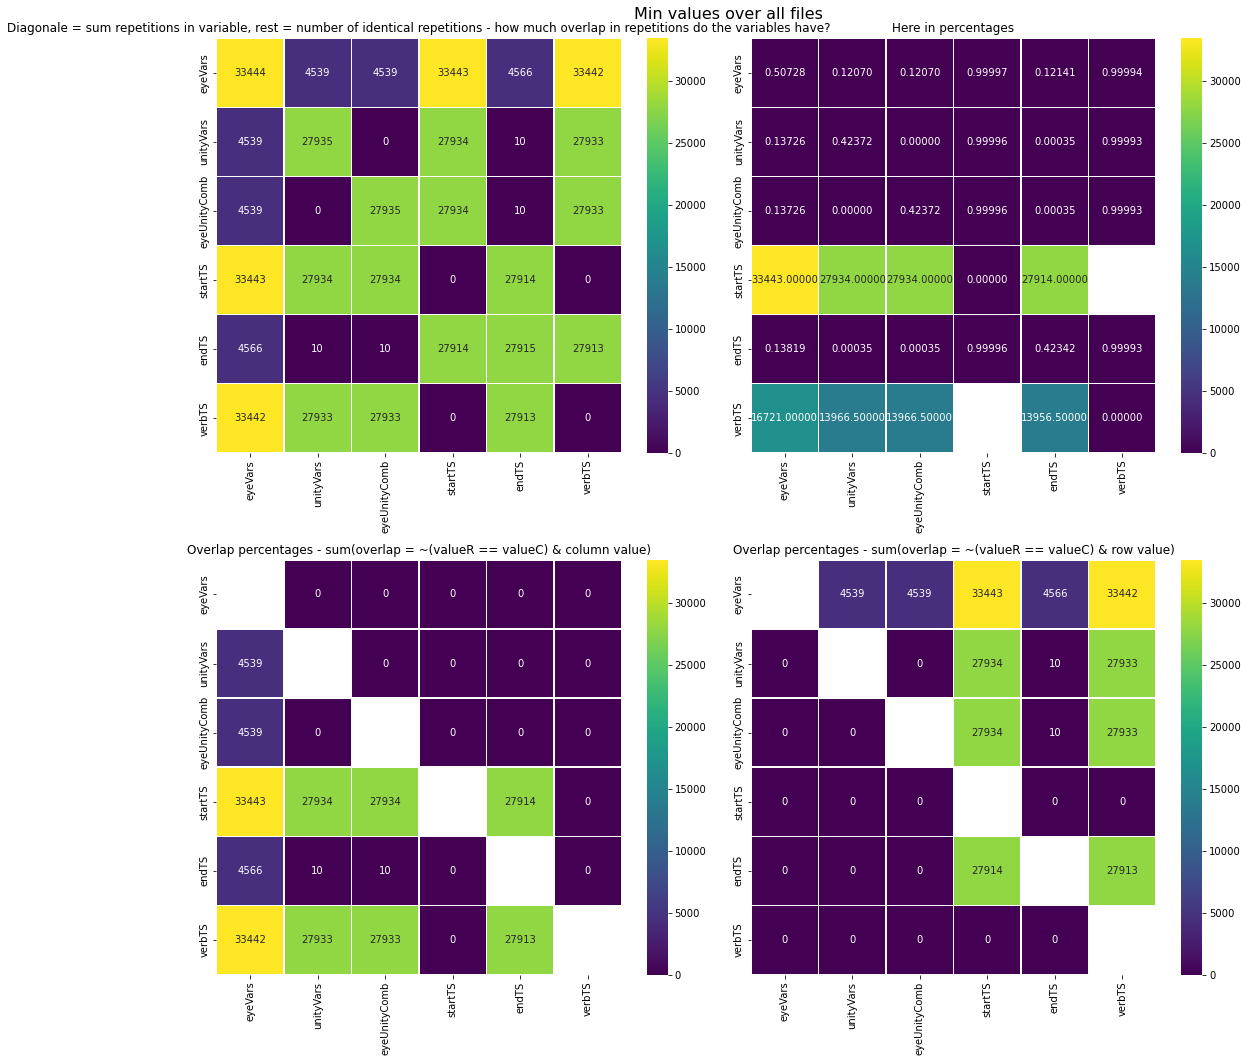

In [58]:
# calculate min

min_matrix00 = np.min(overview_dupl_arr_nr, axis=0)
min_matrix01 = np.min(overview_dupl_arr_p, axis=0)
min_matrix10 = np.min(overview_dupl_arr_p2, axis=0)
min_matrix11 = np.min(overview_dupl_arr_p3, axis=0)


f, ax = plt.subplots(nrows=2, ncols=2, figsize=(15,15))
sns.heatmap(min_matrix00, annot=True, fmt=".0f", linewidths=.5, ax=ax[0,0], cmap = "viridis",
            xticklabels=['eyeVars', 'unityVars', 'eyeUnityComb','startTS','endTS','verbTS'],  # Specify x-axis labels
            yticklabels=['eyeVars', 'unityVars', 'eyeUnityComb','startTS','endTS','verbTS'])               
                
ax[0,0].set_title('Diagonale = sum repetitions in variable, rest = number of identical repetitions - how much overlap in repetitions do the variables have?')

sns.heatmap(min_matrix01, annot=True, fmt=".5f", linewidths=.5, ax=ax[0,1], cmap = "viridis",
            xticklabels=['eyeVars', 'unityVars', 'eyeUnityComb','startTS','endTS','verbTS'],  # Specify x-axis labels
            yticklabels=['eyeVars', 'unityVars', 'eyeUnityComb','startTS','endTS','verbTS'])               
ax[0,1].set_title('Here in percentages')  

sns.heatmap(min_matrix10, annot=True, fmt=".0f", linewidths=.5, ax=ax[1,0], cmap = "viridis",
            xticklabels=['eyeVars', 'unityVars', 'eyeUnityComb','startTS','endTS','verbTS'],  # Specify x-axis labels
            yticklabels=['eyeVars', 'unityVars', 'eyeUnityComb','startTS','endTS','verbTS'])               
ax[1,0].set_title('Overlap percentages - sum(overlap = ~(valueR == valueC) & column value)')

sns.heatmap(min_matrix11, annot=True, fmt=".0f", linewidths=.5, ax=ax[1,1], cmap = "viridis",
            xticklabels=['eyeVars', 'unityVars', 'eyeUnityComb','startTS','endTS','verbTS'],  # Specify x-axis labels
            yticklabels=['eyeVars', 'unityVars', 'eyeUnityComb','startTS','endTS','verbTS'])               
ax[1,1].set_title('Overlap percentages - sum(overlap = ~(valueR == valueC) & row value)') 

f.suptitle('Min values over all files', fontsize=16)

# Adjust layout and display the plot
plt.tight_layout()

# Save the plot to the specified directory
save_file = os.path.join(savepath, 'Min_repetitions_overlap_varGroups.png')
plt.savefig(save_file, format='png')

plt.show()


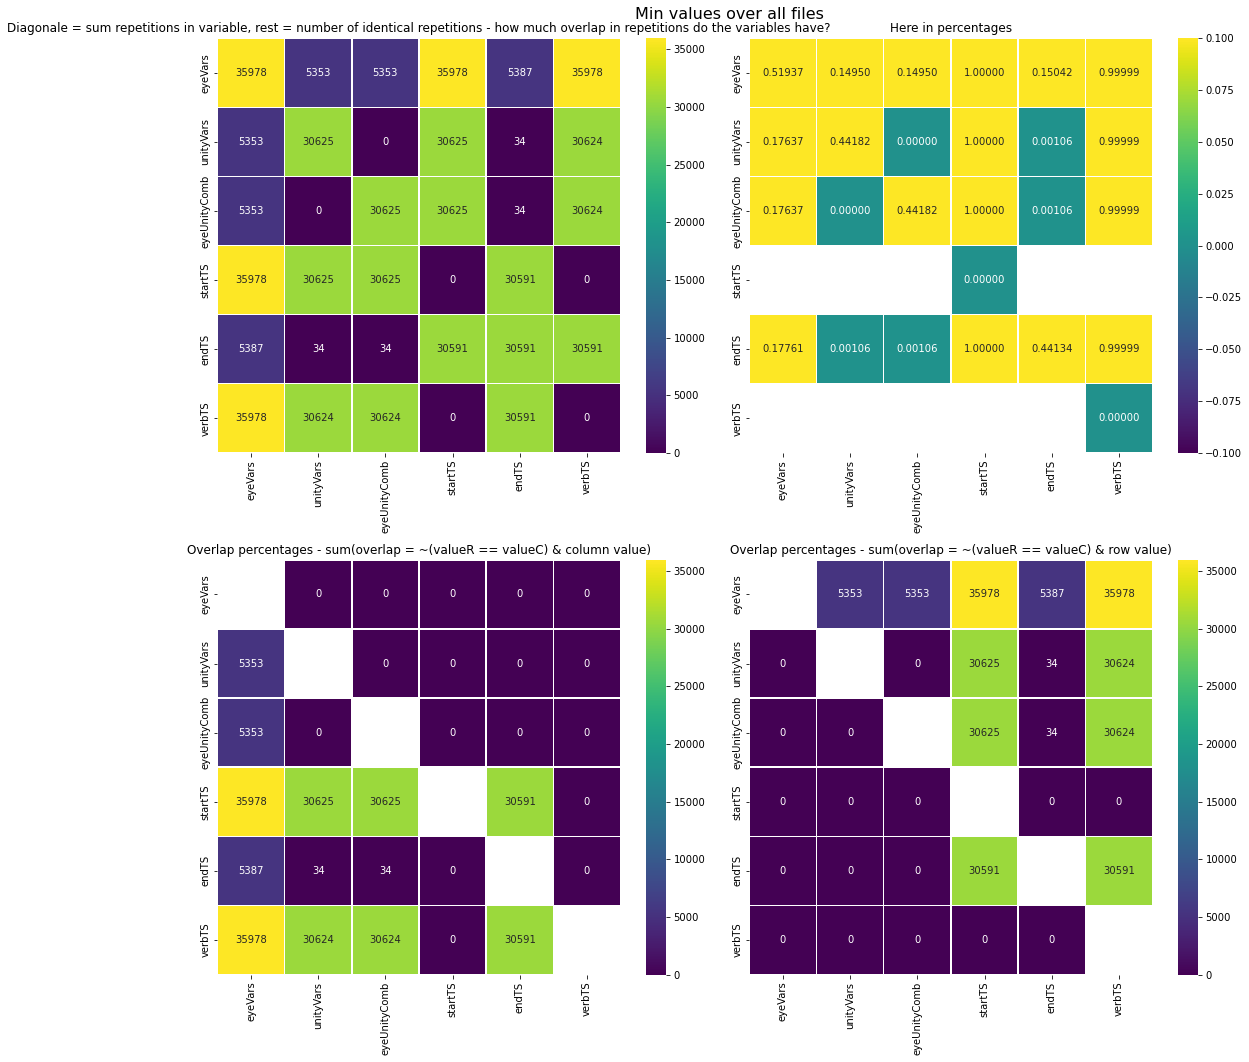

In [57]:

# calculate mean

min_matrix00 = np.mean(overview_dupl_arr_nr, axis=0)
min_matrix01 = np.mean(overview_dupl_arr_p, axis=0)
min_matrix10 = np.mean(overview_dupl_arr_p2, axis=0)
min_matrix11 = np.mean(overview_dupl_arr_p3, axis=0)


f, ax = plt.subplots(nrows=2, ncols=2, figsize=(15,15))
sns.heatmap(min_matrix00, annot=True, fmt=".0f", linewidths=.5, ax=ax[0,0], cmap = "viridis",
            xticklabels=['eyeVars', 'unityVars', 'eyeUnityComb','startTS','endTS','verbTS'],  # Specify x-axis labels
            yticklabels=['eyeVars', 'unityVars', 'eyeUnityComb','startTS','endTS','verbTS'])               
                
ax[0,0].set_title('Diagonale = sum repetitions in variable, rest = number of identical repetitions - how much overlap in repetitions do the variables have?')

sns.heatmap(min_matrix01, annot=True, fmt=".5f", linewidths=.5, ax=ax[0,1], cmap = "viridis",
            xticklabels=['eyeVars', 'unityVars', 'eyeUnityComb','startTS','endTS','verbTS'],  # Specify x-axis labels
            yticklabels=['eyeVars', 'unityVars', 'eyeUnityComb','startTS','endTS','verbTS'])               
ax[0,1].set_title('Here in percentages')  

sns.heatmap(min_matrix10, annot=True, fmt=".0f", linewidths=.5, ax=ax[1,0], cmap = "viridis",
            xticklabels=['eyeVars', 'unityVars', 'eyeUnityComb','startTS','endTS','verbTS'],  # Specify x-axis labels
            yticklabels=['eyeVars', 'unityVars', 'eyeUnityComb','startTS','endTS','verbTS'])               
ax[1,0].set_title('Overlap percentages - sum(overlap = ~(valueR == valueC) & column value)')

sns.heatmap(min_matrix11, annot=True, fmt=".0f", linewidths=.5, ax=ax[1,1], cmap = "viridis",
            xticklabels=['eyeVars', 'unityVars', 'eyeUnityComb','startTS','endTS','verbTS'],  # Specify x-axis labels
            yticklabels=['eyeVars', 'unityVars', 'eyeUnityComb','startTS','endTS','verbTS'])               
ax[1,1].set_title('Overlap percentages - sum(overlap = ~(valueR == valueC) & row value)') 

f.suptitle('Mean values over all files', fontsize=16)

# Adjust layout and display the plot
plt.tight_layout()

save_file = os.path.join(savepath, 'Mean_repetitions_overlap_varGroups.png')
plt.savefig(save_file, format='png')


plt.show()


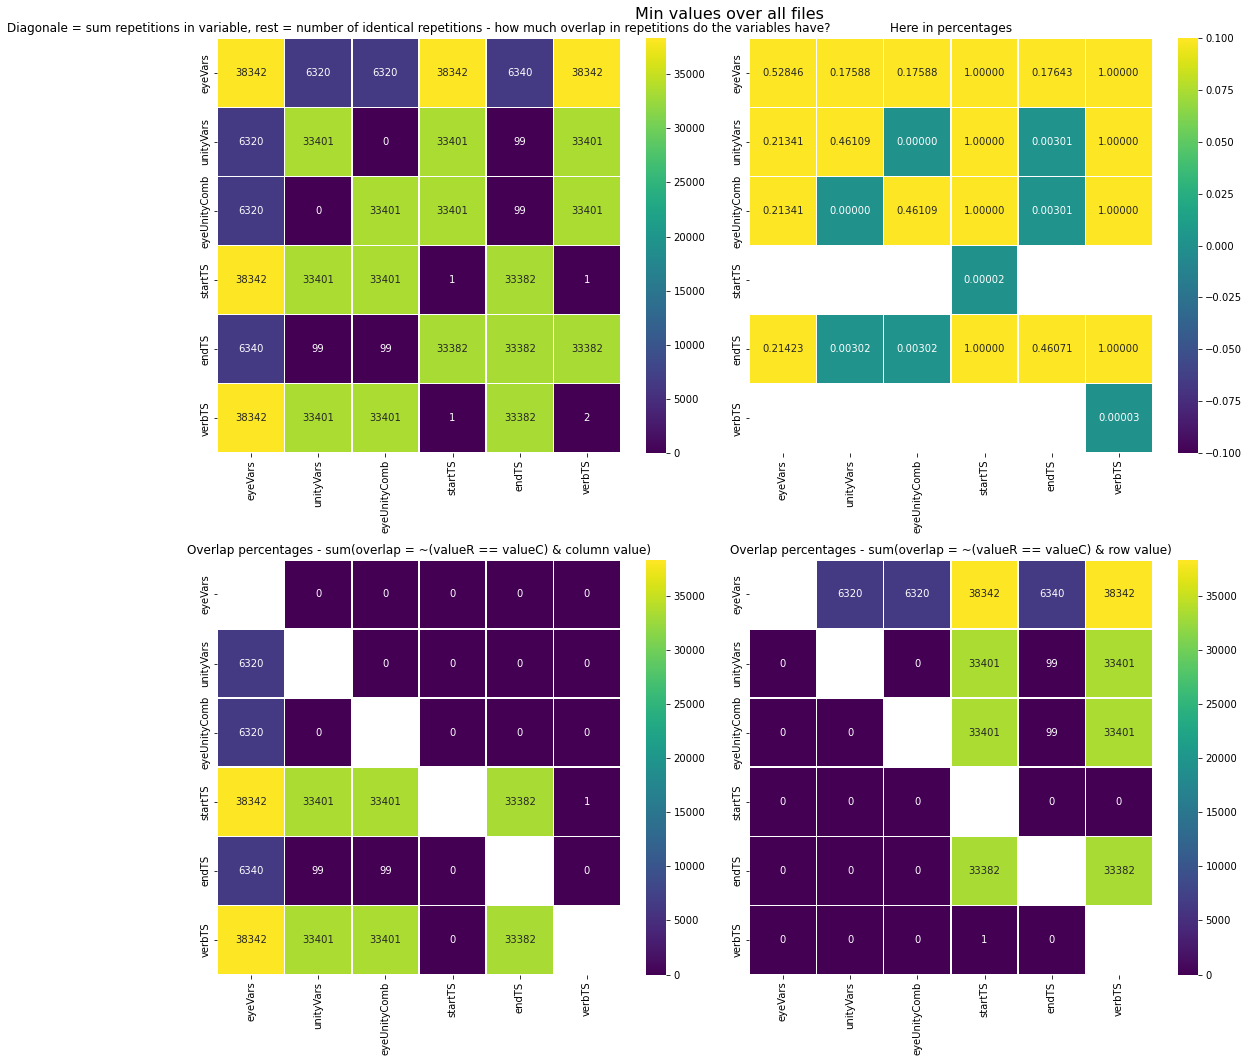

In [59]:


#calculate max



min_matrix00 = np.max(overview_dupl_arr_nr, axis=0)
min_matrix01 = np.max(overview_dupl_arr_p, axis=0)
min_matrix10 = np.max(overview_dupl_arr_p2, axis=0)
min_matrix11 = np.max(overview_dupl_arr_p3, axis=0)


f, ax = plt.subplots(nrows=2, ncols=2, figsize=(15,15))
sns.heatmap(min_matrix00, annot=True, fmt=".0f", linewidths=.5, ax=ax[0,0], cmap = "viridis",
            xticklabels=['eyeVars', 'unityVars', 'eyeUnityComb','startTS','endTS','verbTS'],  # Specify x-axis labels
            yticklabels=['eyeVars', 'unityVars', 'eyeUnityComb','startTS','endTS','verbTS'])               
                
ax[0,0].set_title('Diagonale = sum repetitions in variable, rest = number of identical repetitions - how much overlap in repetitions do the variables have?')

sns.heatmap(min_matrix01, annot=True, fmt=".5f", linewidths=.5, ax=ax[0,1], cmap = "viridis",
            xticklabels=['eyeVars', 'unityVars', 'eyeUnityComb','startTS','endTS','verbTS'],  # Specify x-axis labels
            yticklabels=['eyeVars', 'unityVars', 'eyeUnityComb','startTS','endTS','verbTS'])               
ax[0,1].set_title('Here in percentages')  

sns.heatmap(min_matrix10, annot=True, fmt=".0f", linewidths=.5, ax=ax[1,0], cmap = "viridis",
            xticklabels=['eyeVars', 'unityVars', 'eyeUnityComb','startTS','endTS','verbTS'],  # Specify x-axis labels
            yticklabels=['eyeVars', 'unityVars', 'eyeUnityComb','startTS','endTS','verbTS'])               
ax[1,0].set_title('Overlap percentages - sum(overlap = ~(valueR == valueC) & column value)')

sns.heatmap(min_matrix11, annot=True, fmt=".0f", linewidths=.5, ax=ax[1,1], cmap = "viridis",
            xticklabels=['eyeVars', 'unityVars', 'eyeUnityComb','startTS','endTS','verbTS'],  # Specify x-axis labels
            yticklabels=['eyeVars', 'unityVars', 'eyeUnityComb','startTS','endTS','verbTS'])               
ax[1,1].set_title('Overlap percentages - sum(overlap = ~(valueR == valueC) & row value)') 

f.suptitle('Max values over all files', fontsize=16)

# Adjust layout and display the plot
plt.tight_layout()

save_file = os.path.join(savepath, 'Max_repetitions_overlap_varGroups.png')
plt.savefig(save_file, format='png')

plt.show()
    

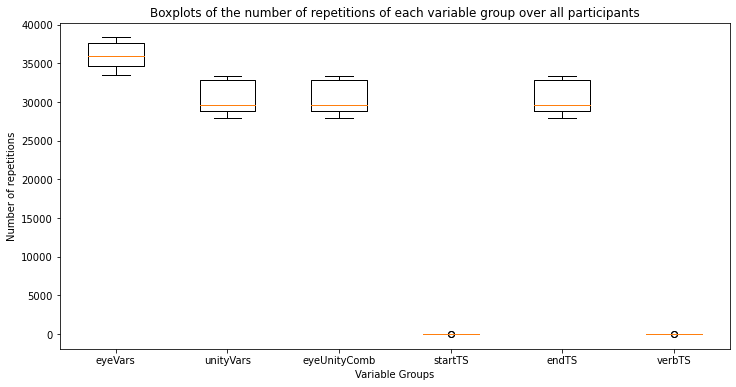

In [60]:
diagonal_elements = [[] for _ in range(6)]

for matrix in overview_dupl_arr_nr:
    for i in range(6):
        diagonal_elements[i].append(matrix[i, i])

# Create boxplots for each diagonal field
plt.figure(figsize=(12, 6))
plt.boxplot(diagonal_elements, labels=['eyeVars', 'unityVars', 'eyeUnityComb','startTS','endTS','verbTS'])
plt.title('Boxplots of the number of repetitions of each variable group over all participants')
plt.xlabel('Variable Groups')
plt.ylabel('Number of repetitions')



# Save the plot to the specified directory
save_file = os.path.join(savepath, 'Boxplot_number_repeptitions_variablesGroups.png')
plt.savefig(save_file, format='png')

plt.show()

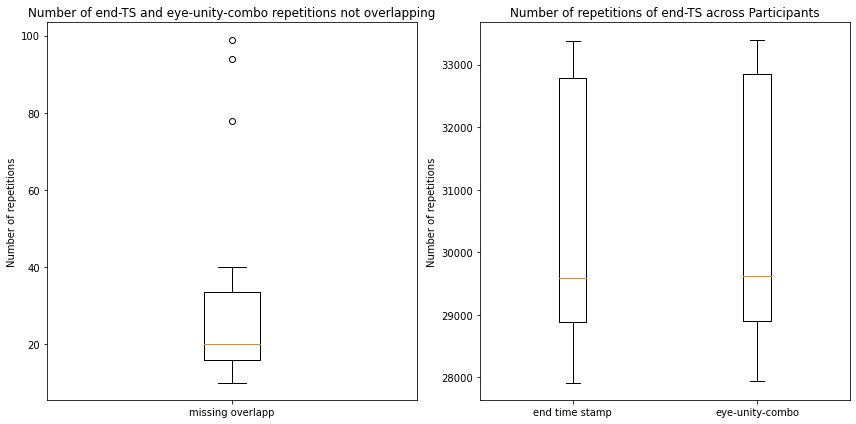

In [61]:
elements = [matrix[4, 2] for matrix in overview_dupl_arr_nr]
elements2 = [matrix[4, 4] for matrix in overview_dupl_arr_nr]
elements3 = [matrix[2, 2] for matrix in overview_dupl_arr_nr]


# Create a boxplot for these elements
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,6))

ax[0].boxplot(elements, labels = ['missing overlapp'])
ax[0].set_title('Number of end-TS and eye-unity-combo repetitions not overlapping')
ax[0].set_ylabel('Number of repetitions')

ax[1].boxplot([elements2,elements3], labels = ['end time stamp', 'eye-unity-combo'])
ax[1].set_title('Number of repetitions of end-TS across Participants')
ax[1].set_ylabel('Number of repetitions')

# f.suptitle('Min values over all files', fontsize=16)

# Adjust layout and display the plot
plt.tight_layout()

# Save the plot to the specified directory
save_file = os.path.join(savepath, 'Boxplots_endTS_eyeUnityCombi.png')
plt.savefig(save_file, format='png')



plt.show()

In [41]:
# os.chdir(DATA_PATH)
print('start')
# useful overviews
noFilePartList = [len(PartList)]
missingFiles = pd.DataFrame(columns=['Participant', 'Session'])

list_dublicates = []
# shared_list_lock = multiprocessing.Lock()


# loop code over all participants in participant list
parts_pbar = tqdm(
    iterable=PartList,
    total=len(PartList),
    desc="participants",
    dynamic_ncols=True,
    bar_format=B_FORMAT,
)

dupl_df2 = pd.DataFrame(columns=['Participant', 
                'Session', 
                'ETSess', 
                'dataLength', 
                'streak_lengths'])

allStreaksLengths = []


for indexPart, currentPart in enumerate(parts_pbar):
#     currentPart = PartList[indexPart]
    print(f'Participant {indexPart} - participant ID {currentPart}')
    
    sessions = list(range(1,6))
#     sessions = list(range(2,3))
    
    session_pbar = tqdm(
        iterable=sessions,
        total=len(sessions),
        desc="sessions________",
        dynamic_ncols=True,
        bar_format=B_FORMAT,
    )
    
    
    # loop over recording sessions (should be 5 for each participant)
#     for indexSess in range(1, 6):
#     for indexSess in range(1, 2):
    for indexSess in session_pbar:

        # get eye tracking sessions and loop over them (amount of ET files can vary)
        dirSess = [f for f in os.listdir(DATA_PATH) if f.startswith(f'{currentPart}_Session_{indexSess}') and f.endswith('_data_prepared.csv')]
#         print(dirSess)
#         print(f'Session {indexSess}')
        
        if not dirSess:
            hMF = pd.DataFrame({'Participant': [currentPart], 'Session': [indexSess]})
            missingFiles = pd.concat([missingFiles, hMF], ignore_index=True)
            
        else:
            # Main part - runs if files exist
            
#             participants progress bar
            file_pbar = tqdm(
                iterable=dirSess,
                total=len(dirSess),
                desc="📂 ET files____________",
                dynamic_ncols=True,
                bar_format=B_FORMAT,
            )

#             parts_pbar = tqdm(
#                 iterable=dirSess[:1],
#                 total=1,
#                 desc="📂 participants",
#                 dynamic_ncols=True,
#                 bar_format=B_FORMAT,
#             )
    
           
            # loop necessary for displaying properly the progressbar with multiprocessing
            # source: https://stackoverflow.com/a/40133278
            
#             info_list = []
            
            for file in file_pbar:
#             for file in dirSess[2]:
                print('process file ', file)
            
                # read in data
                data = pd.read_csv(os.path.join(DATA_PATH, file))
                
#                 data = convertTimeStamp(data)
                               
                dataLen = len(data)

                eyeUnityComb = data.columns[10:37]
                # check if vars are correctly selected
                # for column_name in enumerate(eyeUnityComb):
                #     print(column_name)
                eyeUnityComb_dupl = checkDuplicates(data, eyeUnityComb)
#                 print('eye unity combination vars sum duplicates percentage', sum(eyeUnityComb_dupl)/len(data))
#                 print('--------------------')
                # Initialize variables to track the lengths of streaks
                current_streak = 0

                # Iterate through the boolean variable column to count streak lengths
                for value in eyeUnityComb_dupl:
                    if value == 1:
                        current_streak += 1
                    else:
                        if current_streak > 0:
                            allStreaksLengths.append(current_streak)
                        current_streak = 0

                # Append the last streak if it ended at the end of the series
                if current_streak > 0:
                    allStreaksLengths.append(current_streak)
                    

allStreaksLengths = np.array(allStreaksLengths)


                

                
                

start


📄 0 of 26 participants processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

Participant 0 - participant ID 1004


📄 0 of 5 sessions________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  1004_Session_1_ET_1_data_prepared.csv
process file  1004_Session_1_ET_2_data_prepared.csv
process file  1004_Session_1_ET_3_data_prepared.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  1004_Session_2_ET_1_data_prepared.csv
process file  1004_Session_2_ET_2_data_prepared.csv
process file  1004_Session_2_ET_3_data_prepared.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  1004_Session_3_ET_1_data_prepared.csv
process file  1004_Session_3_ET_2_data_prepared.csv
process file  1004_Session_3_ET_3_data_prepared.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  1004_Session_4_ET_1_data_prepared.csv
process file  1004_Session_4_ET_2_data_prepared.csv
process file  1004_Session_4_ET_3_data_prepared.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  1004_Session_5_ET_1_data_prepared.csv
process file  1004_Session_5_ET_2_data_prepared.csv
process file  1004_Session_5_ET_3_data_prepared.csv
Participant 1 - participant ID 1005


📄 0 of 5 sessions________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  1005_Session_1_ET_1_data_prepared.csv
process file  1005_Session_1_ET_2_data_prepared.csv
process file  1005_Session_1_ET_3_data_prepared.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  1005_Session_2_ET_1_data_prepared.csv
process file  1005_Session_2_ET_2_data_prepared.csv
process file  1005_Session_2_ET_3_data_prepared.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  1005_Session_3_ET_1_data_prepared.csv
process file  1005_Session_3_ET_2_data_prepared.csv
process file  1005_Session_3_ET_3_data_prepared.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  1005_Session_4_ET_1_data_prepared.csv
process file  1005_Session_4_ET_2_data_prepared.csv
process file  1005_Session_4_ET_3_data_prepared.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  1005_Session_5_ET_1_data_prepared.csv
process file  1005_Session_5_ET_2_data_prepared.csv
process file  1005_Session_5_ET_3_data_prepared.csv
Participant 2 - participant ID 1008


📄 0 of 5 sessions________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  1008_Session_1_ET_1_data_prepared.csv
process file  1008_Session_1_ET_2_data_prepared.csv
process file  1008_Session_1_ET_3_data_prepared.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  1008_Session_2_ET_1_data_prepared.csv
process file  1008_Session_2_ET_2_data_prepared.csv
process file  1008_Session_2_ET_3_data_prepared.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  1008_Session_3_ET_1_data_prepared.csv
process file  1008_Session_3_ET_2_data_prepared.csv
process file  1008_Session_3_ET_3_data_prepared.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  1008_Session_4_ET_1_data_prepared.csv
process file  1008_Session_4_ET_2_data_prepared.csv
process file  1008_Session_4_ET_3_data_prepared.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  1008_Session_5_ET_1_data_prepared.csv
process file  1008_Session_5_ET_2_data_prepared.csv
process file  1008_Session_5_ET_3_data_prepared.csv
Participant 3 - participant ID 1010


📄 0 of 5 sessions________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

📄 0 of 4 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  1010_Session_1_ET_1_data_prepared.csv
process file  1010_Session_1_ET_2_data_prepared.csv
process file  1010_Session_1_ET_3_data_prepared.csv
process file  1010_Session_1_ET_4_data_prepared.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  1010_Session_2_ET_1_data_prepared.csv
process file  1010_Session_2_ET_2_data_prepared.csv
process file  1010_Session_2_ET_3_data_prepared.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  1010_Session_3_ET_1_data_prepared.csv
process file  1010_Session_3_ET_2_data_prepared.csv
process file  1010_Session_3_ET_3_data_prepared.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  1010_Session_4_ET_1_data_prepared.csv
process file  1010_Session_4_ET_2_data_prepared.csv
process file  1010_Session_4_ET_3_data_prepared.csv


📄 0 of 4 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  1010_Session_5_ET_1_data_prepared.csv
process file  1010_Session_5_ET_2_data_prepared.csv
process file  1010_Session_5_ET_3_data_prepared.csv
process file  1010_Session_5_ET_4_data_prepared.csv
Participant 4 - participant ID 1011


📄 0 of 5 sessions________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

📄 0 of 4 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  1011_Session_1_ET_1_data_prepared.csv
process file  1011_Session_1_ET_2_data_prepared.csv
process file  1011_Session_1_ET_3_data_prepared.csv
process file  1011_Session_1_ET_4_data_prepared.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  1011_Session_2_ET_1_data_prepared.csv
process file  1011_Session_2_ET_2_data_prepared.csv
process file  1011_Session_2_ET_3_data_prepared.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  1011_Session_3_ET_1_data_prepared.csv
process file  1011_Session_3_ET_2_data_prepared.csv
process file  1011_Session_3_ET_3_data_prepared.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  1011_Session_4_ET_1_data_prepared.csv
process file  1011_Session_4_ET_2_data_prepared.csv
process file  1011_Session_4_ET_3_data_prepared.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  1011_Session_5_ET_1_data_prepared.csv
process file  1011_Session_5_ET_2_data_prepared.csv
process file  1011_Session_5_ET_3_data_prepared.csv
Participant 5 - participant ID 1013


📄 0 of 5 sessions________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  1013_Session_1_ET_1_data_prepared.csv
process file  1013_Session_1_ET_2_data_prepared.csv
process file  1013_Session_1_ET_3_data_prepared.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  1013_Session_2_ET_1_data_prepared.csv
process file  1013_Session_2_ET_2_data_prepared.csv
process file  1013_Session_2_ET_3_data_prepared.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  1013_Session_3_ET_1_data_prepared.csv
process file  1013_Session_3_ET_2_data_prepared.csv
process file  1013_Session_3_ET_3_data_prepared.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  1013_Session_4_ET_1_data_prepared.csv
process file  1013_Session_4_ET_2_data_prepared.csv
process file  1013_Session_4_ET_3_data_prepared.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  1013_Session_5_ET_1_data_prepared.csv
process file  1013_Session_5_ET_2_data_prepared.csv
process file  1013_Session_5_ET_3_data_prepared.csv
Participant 6 - participant ID 1017


📄 0 of 5 sessions________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

📄 0 of 5 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  1017_Session_1_ET_1_data_prepared.csv
process file  1017_Session_1_ET_2_data_prepared.csv
process file  1017_Session_1_ET_3_data_prepared.csv
process file  1017_Session_1_ET_4_data_prepared.csv
process file  1017_Session_1_ET_5_data_prepared.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  1017_Session_2_ET_1_data_prepared.csv
process file  1017_Session_2_ET_2_data_prepared.csv
process file  1017_Session_2_ET_3_data_prepared.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  1017_Session_3_ET_1_data_prepared.csv
process file  1017_Session_3_ET_2_data_prepared.csv
process file  1017_Session_3_ET_3_data_prepared.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  1017_Session_4_ET_1_data_prepared.csv
process file  1017_Session_4_ET_2_data_prepared.csv
process file  1017_Session_4_ET_3_data_prepared.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  1017_Session_5_ET_1_data_prepared.csv
process file  1017_Session_5_ET_2_data_prepared.csv
process file  1017_Session_5_ET_3_data_prepared.csv
Participant 7 - participant ID 1018


📄 0 of 5 sessions________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

📄 0 of 4 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  1018_Session_1_ET_1_data_prepared.csv
process file  1018_Session_1_ET_2_data_prepared.csv
process file  1018_Session_1_ET_3_data_prepared.csv
process file  1018_Session_1_ET_4_data_prepared.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  1018_Session_2_ET_1_data_prepared.csv
process file  1018_Session_2_ET_2_data_prepared.csv
process file  1018_Session_2_ET_3_data_prepared.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  1018_Session_3_ET_1_data_prepared.csv
process file  1018_Session_3_ET_2_data_prepared.csv
process file  1018_Session_3_ET_3_data_prepared.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  1018_Session_4_ET_1_data_prepared.csv
process file  1018_Session_4_ET_2_data_prepared.csv
process file  1018_Session_4_ET_3_data_prepared.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  1018_Session_5_ET_1_data_prepared.csv
process file  1018_Session_5_ET_2_data_prepared.csv
process file  1018_Session_5_ET_3_data_prepared.csv
Participant 8 - participant ID 1019


📄 0 of 5 sessions________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  1019_Session_1_ET_1_data_prepared.csv
process file  1019_Session_1_ET_2_data_prepared.csv
process file  1019_Session_1_ET_3_data_prepared.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  1019_Session_2_ET_1_data_prepared.csv
process file  1019_Session_2_ET_2_data_prepared.csv
process file  1019_Session_2_ET_3_data_prepared.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  1019_Session_3_ET_1_data_prepared.csv
process file  1019_Session_3_ET_2_data_prepared.csv
process file  1019_Session_3_ET_3_data_prepared.csv


📄 0 of 4 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  1019_Session_4_ET_1_data_prepared.csv
process file  1019_Session_4_ET_2_data_prepared.csv
process file  1019_Session_4_ET_3_data_prepared.csv
process file  1019_Session_4_ET_4_data_prepared.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  1019_Session_5_ET_1_data_prepared.csv
process file  1019_Session_5_ET_2_data_prepared.csv
process file  1019_Session_5_ET_3_data_prepared.csv
Participant 9 - participant ID 1021


📄 0 of 5 sessions________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  1021_Session_1_ET_1_data_prepared.csv
process file  1021_Session_1_ET_2_data_prepared.csv
process file  1021_Session_1_ET_3_data_prepared.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  1021_Session_2_ET_1_data_prepared.csv
process file  1021_Session_2_ET_2_data_prepared.csv
process file  1021_Session_2_ET_3_data_prepared.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  1021_Session_3_ET_1_data_prepared.csv
process file  1021_Session_3_ET_2_data_prepared.csv
process file  1021_Session_3_ET_3_data_prepared.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  1021_Session_4_ET_1_data_prepared.csv
process file  1021_Session_4_ET_2_data_prepared.csv
process file  1021_Session_4_ET_3_data_prepared.csv


📄 0 of 4 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  1021_Session_5_ET_1_data_prepared.csv
process file  1021_Session_5_ET_2_data_prepared.csv
process file  1021_Session_5_ET_3_data_prepared.csv
process file  1021_Session_5_ET_4_data_prepared.csv
Participant 10 - participant ID 1022


📄 0 of 5 sessions________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  1022_Session_1_ET_1_data_prepared.csv
process file  1022_Session_1_ET_2_data_prepared.csv
process file  1022_Session_1_ET_3_data_prepared.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  1022_Session_2_ET_1_data_prepared.csv
process file  1022_Session_2_ET_2_data_prepared.csv
process file  1022_Session_2_ET_3_data_prepared.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  1022_Session_3_ET_1_data_prepared.csv
process file  1022_Session_3_ET_2_data_prepared.csv
process file  1022_Session_3_ET_3_data_prepared.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  1022_Session_4_ET_1_data_prepared.csv
process file  1022_Session_4_ET_2_data_prepared.csv
process file  1022_Session_4_ET_3_data_prepared.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  1022_Session_5_ET_1_data_prepared.csv
process file  1022_Session_5_ET_2_data_prepared.csv
process file  1022_Session_5_ET_3_data_prepared.csv
Participant 11 - participant ID 1023


📄 0 of 5 sessions________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  1023_Session_1_ET_1_data_prepared.csv
process file  1023_Session_1_ET_2_data_prepared.csv
process file  1023_Session_1_ET_3_data_prepared.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  1023_Session_2_ET_1_data_prepared.csv
process file  1023_Session_2_ET_2_data_prepared.csv
process file  1023_Session_2_ET_3_data_prepared.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  1023_Session_3_ET_1_data_prepared.csv
process file  1023_Session_3_ET_2_data_prepared.csv
process file  1023_Session_3_ET_3_data_prepared.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  1023_Session_4_ET_1_data_prepared.csv
process file  1023_Session_4_ET_2_data_prepared.csv
process file  1023_Session_4_ET_3_data_prepared.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  1023_Session_5_ET_1_data_prepared.csv
process file  1023_Session_5_ET_2_data_prepared.csv
process file  1023_Session_5_ET_3_data_prepared.csv
Participant 12 - participant ID 1054


📄 0 of 5 sessions________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  1054_Session_1_ET_1_data_prepared.csv
process file  1054_Session_1_ET_2_data_prepared.csv
process file  1054_Session_1_ET_3_data_prepared.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  1054_Session_2_ET_1_data_prepared.csv
process file  1054_Session_2_ET_2_data_prepared.csv
process file  1054_Session_2_ET_3_data_prepared.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  1054_Session_3_ET_1_data_prepared.csv
process file  1054_Session_3_ET_2_data_prepared.csv
process file  1054_Session_3_ET_3_data_prepared.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  1054_Session_4_ET_1_data_prepared.csv
process file  1054_Session_4_ET_2_data_prepared.csv
process file  1054_Session_4_ET_3_data_prepared.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  1054_Session_5_ET_1_data_prepared.csv
process file  1054_Session_5_ET_2_data_prepared.csv
process file  1054_Session_5_ET_3_data_prepared.csv
Participant 13 - participant ID 1055


📄 0 of 5 sessions________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  1055_Session_1_ET_1_data_prepared.csv
process file  1055_Session_1_ET_2_data_prepared.csv
process file  1055_Session_1_ET_3_data_prepared.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  1055_Session_2_ET_1_data_prepared.csv
process file  1055_Session_2_ET_2_data_prepared.csv
process file  1055_Session_2_ET_3_data_prepared.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  1055_Session_3_ET_1_data_prepared.csv
process file  1055_Session_3_ET_2_data_prepared.csv
process file  1055_Session_3_ET_3_data_prepared.csv


📄 0 of 4 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  1055_Session_4_ET_1_data_prepared.csv
process file  1055_Session_4_ET_2_data_prepared.csv
process file  1055_Session_4_ET_3_data_prepared.csv
process file  1055_Session_4_ET_4_data_prepared.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  1055_Session_5_ET_1_data_prepared.csv
process file  1055_Session_5_ET_2_data_prepared.csv
process file  1055_Session_5_ET_3_data_prepared.csv
Participant 14 - participant ID 1056


📄 0 of 5 sessions________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  1056_Session_1_ET_1_data_prepared.csv
process file  1056_Session_1_ET_2_data_prepared.csv
process file  1056_Session_1_ET_3_data_prepared.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  1056_Session_2_ET_1_data_prepared.csv
process file  1056_Session_2_ET_2_data_prepared.csv
process file  1056_Session_2_ET_3_data_prepared.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  1056_Session_3_ET_1_data_prepared.csv
process file  1056_Session_3_ET_2_data_prepared.csv
process file  1056_Session_3_ET_3_data_prepared.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  1056_Session_4_ET_1_data_prepared.csv
process file  1056_Session_4_ET_2_data_prepared.csv
process file  1056_Session_4_ET_3_data_prepared.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  1056_Session_5_ET_1_data_prepared.csv
process file  1056_Session_5_ET_2_data_prepared.csv
process file  1056_Session_5_ET_3_data_prepared.csv
Participant 15 - participant ID 1057


📄 0 of 5 sessions________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  1057_Session_1_ET_1_data_prepared.csv
process file  1057_Session_1_ET_2_data_prepared.csv
process file  1057_Session_1_ET_3_data_prepared.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  1057_Session_2_ET_1_data_prepared.csv
process file  1057_Session_2_ET_2_data_prepared.csv
process file  1057_Session_2_ET_3_data_prepared.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  1057_Session_3_ET_1_data_prepared.csv
process file  1057_Session_3_ET_2_data_prepared.csv
process file  1057_Session_3_ET_3_data_prepared.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  1057_Session_4_ET_1_data_prepared.csv
process file  1057_Session_4_ET_2_data_prepared.csv
process file  1057_Session_4_ET_3_data_prepared.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  1057_Session_5_ET_1_data_prepared.csv
process file  1057_Session_5_ET_2_data_prepared.csv
process file  1057_Session_5_ET_3_data_prepared.csv
Participant 16 - participant ID 1058


📄 0 of 5 sessions________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

📄 0 of 4 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  1058_Session_1_ET_1_data_prepared.csv
process file  1058_Session_1_ET_2_data_prepared.csv
process file  1058_Session_1_ET_3_data_prepared.csv
process file  1058_Session_1_ET_4_data_prepared.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  1058_Session_2_ET_1_data_prepared.csv
process file  1058_Session_2_ET_2_data_prepared.csv
process file  1058_Session_2_ET_3_data_prepared.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  1058_Session_3_ET_1_data_prepared.csv
process file  1058_Session_3_ET_2_data_prepared.csv
process file  1058_Session_3_ET_3_data_prepared.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  1058_Session_4_ET_1_data_prepared.csv
process file  1058_Session_4_ET_2_data_prepared.csv
process file  1058_Session_4_ET_3_data_prepared.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  1058_Session_5_ET_1_data_prepared.csv
process file  1058_Session_5_ET_2_data_prepared.csv
process file  1058_Session_5_ET_3_data_prepared.csv
Participant 17 - participant ID 1068


📄 0 of 5 sessions________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

📄 0 of 4 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  1068_Session_1_ET_1_data_prepared.csv
process file  1068_Session_1_ET_2_data_prepared.csv
process file  1068_Session_1_ET_3_data_prepared.csv
process file  1068_Session_1_ET_4_data_prepared.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  1068_Session_2_ET_1_data_prepared.csv
process file  1068_Session_2_ET_2_data_prepared.csv
process file  1068_Session_2_ET_3_data_prepared.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  1068_Session_3_ET_1_data_prepared.csv
process file  1068_Session_3_ET_2_data_prepared.csv
process file  1068_Session_3_ET_3_data_prepared.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  1068_Session_4_ET_1_data_prepared.csv
process file  1068_Session_4_ET_2_data_prepared.csv
process file  1068_Session_4_ET_3_data_prepared.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  1068_Session_5_ET_1_data_prepared.csv
process file  1068_Session_5_ET_2_data_prepared.csv
process file  1068_Session_5_ET_3_data_prepared.csv
Participant 18 - participant ID 1069


📄 0 of 5 sessions________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  1069_Session_1_ET_1_data_prepared.csv
process file  1069_Session_1_ET_2_data_prepared.csv
process file  1069_Session_1_ET_3_data_prepared.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  1069_Session_2_ET_1_data_prepared.csv
process file  1069_Session_2_ET_2_data_prepared.csv
process file  1069_Session_2_ET_3_data_prepared.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  1069_Session_3_ET_1_data_prepared.csv
process file  1069_Session_3_ET_2_data_prepared.csv
process file  1069_Session_3_ET_3_data_prepared.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  1069_Session_4_ET_1_data_prepared.csv
process file  1069_Session_4_ET_2_data_prepared.csv
process file  1069_Session_4_ET_3_data_prepared.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  1069_Session_5_ET_1_data_prepared.csv
process file  1069_Session_5_ET_2_data_prepared.csv
process file  1069_Session_5_ET_3_data_prepared.csv
Participant 19 - participant ID 1072


📄 0 of 5 sessions________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  1072_Session_1_ET_1_data_prepared.csv
process file  1072_Session_1_ET_2_data_prepared.csv
process file  1072_Session_1_ET_3_data_prepared.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  1072_Session_2_ET_1_data_prepared.csv
process file  1072_Session_2_ET_2_data_prepared.csv
process file  1072_Session_2_ET_3_data_prepared.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  1072_Session_3_ET_1_data_prepared.csv
process file  1072_Session_3_ET_2_data_prepared.csv
process file  1072_Session_3_ET_3_data_prepared.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  1072_Session_4_ET_1_data_prepared.csv
process file  1072_Session_4_ET_2_data_prepared.csv
process file  1072_Session_4_ET_3_data_prepared.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  1072_Session_5_ET_1_data_prepared.csv
process file  1072_Session_5_ET_2_data_prepared.csv
process file  1072_Session_5_ET_3_data_prepared.csv
Participant 20 - participant ID 1073


📄 0 of 5 sessions________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  1073_Session_1_ET_1_data_prepared.csv
process file  1073_Session_1_ET_2_data_prepared.csv
process file  1073_Session_1_ET_3_data_prepared.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  1073_Session_2_ET_1_data_prepared.csv
process file  1073_Session_2_ET_2_data_prepared.csv
process file  1073_Session_2_ET_3_data_prepared.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  1073_Session_3_ET_1_data_prepared.csv
process file  1073_Session_3_ET_2_data_prepared.csv
process file  1073_Session_3_ET_3_data_prepared.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  1073_Session_4_ET_1_data_prepared.csv
process file  1073_Session_4_ET_2_data_prepared.csv
process file  1073_Session_4_ET_3_data_prepared.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  1073_Session_5_ET_1_data_prepared.csv
process file  1073_Session_5_ET_2_data_prepared.csv
process file  1073_Session_5_ET_3_data_prepared.csv
Participant 21 - participant ID 1074


📄 0 of 5 sessions________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  1074_Session_1_ET_1_data_prepared.csv
process file  1074_Session_1_ET_2_data_prepared.csv
process file  1074_Session_1_ET_3_data_prepared.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  1074_Session_2_ET_1_data_prepared.csv
process file  1074_Session_2_ET_2_data_prepared.csv
process file  1074_Session_2_ET_3_data_prepared.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  1074_Session_3_ET_1_data_prepared.csv
process file  1074_Session_3_ET_2_data_prepared.csv
process file  1074_Session_3_ET_3_data_prepared.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  1074_Session_4_ET_1_data_prepared.csv
process file  1074_Session_4_ET_2_data_prepared.csv
process file  1074_Session_4_ET_3_data_prepared.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  1074_Session_5_ET_1_data_prepared.csv
process file  1074_Session_5_ET_2_data_prepared.csv
process file  1074_Session_5_ET_3_data_prepared.csv
Participant 22 - participant ID 1075


📄 0 of 5 sessions________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  1075_Session_1_ET_1_data_prepared.csv
process file  1075_Session_1_ET_2_data_prepared.csv
process file  1075_Session_1_ET_3_data_prepared.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  1075_Session_2_ET_1_data_prepared.csv
process file  1075_Session_2_ET_2_data_prepared.csv
process file  1075_Session_2_ET_3_data_prepared.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  1075_Session_3_ET_1_data_prepared.csv
process file  1075_Session_3_ET_2_data_prepared.csv
process file  1075_Session_3_ET_3_data_prepared.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  1075_Session_4_ET_1_data_prepared.csv
process file  1075_Session_4_ET_2_data_prepared.csv
process file  1075_Session_4_ET_3_data_prepared.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  1075_Session_5_ET_1_data_prepared.csv
process file  1075_Session_5_ET_2_data_prepared.csv
process file  1075_Session_5_ET_3_data_prepared.csv
Participant 23 - participant ID 1077


📄 0 of 5 sessions________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  1077_Session_1_ET_1_data_prepared.csv
process file  1077_Session_1_ET_2_data_prepared.csv
process file  1077_Session_1_ET_3_data_prepared.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  1077_Session_2_ET_1_data_prepared.csv
process file  1077_Session_2_ET_2_data_prepared.csv
process file  1077_Session_2_ET_3_data_prepared.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  1077_Session_3_ET_1_data_prepared.csv
process file  1077_Session_3_ET_2_data_prepared.csv
process file  1077_Session_3_ET_3_data_prepared.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  1077_Session_4_ET_1_data_prepared.csv
process file  1077_Session_4_ET_2_data_prepared.csv
process file  1077_Session_4_ET_3_data_prepared.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  1077_Session_5_ET_1_data_prepared.csv
process file  1077_Session_5_ET_2_data_prepared.csv
process file  1077_Session_5_ET_3_data_prepared.csv
Participant 24 - participant ID 1079


📄 0 of 5 sessions________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  1079_Session_1_ET_1_data_prepared.csv
process file  1079_Session_1_ET_2_data_prepared.csv
process file  1079_Session_1_ET_3_data_prepared.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  1079_Session_2_ET_1_data_prepared.csv
process file  1079_Session_2_ET_2_data_prepared.csv
process file  1079_Session_2_ET_3_data_prepared.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  1079_Session_3_ET_1_data_prepared.csv
process file  1079_Session_3_ET_2_data_prepared.csv
process file  1079_Session_3_ET_3_data_prepared.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  1079_Session_4_ET_1_data_prepared.csv
process file  1079_Session_4_ET_2_data_prepared.csv
process file  1079_Session_4_ET_3_data_prepared.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  1079_Session_5_ET_1_data_prepared.csv
process file  1079_Session_5_ET_2_data_prepared.csv
process file  1079_Session_5_ET_3_data_prepared.csv
Participant 25 - participant ID 1080


📄 0 of 5 sessions________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  1080_Session_1_ET_1_data_prepared.csv
process file  1080_Session_1_ET_2_data_prepared.csv
process file  1080_Session_1_ET_3_data_prepared.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  1080_Session_2_ET_1_data_prepared.csv
process file  1080_Session_2_ET_2_data_prepared.csv
process file  1080_Session_2_ET_3_data_prepared.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  1080_Session_3_ET_1_data_prepared.csv
process file  1080_Session_3_ET_2_data_prepared.csv
process file  1080_Session_3_ET_3_data_prepared.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  1080_Session_4_ET_1_data_prepared.csv
process file  1080_Session_4_ET_2_data_prepared.csv
process file  1080_Session_4_ET_3_data_prepared.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  1080_Session_5_ET_1_data_prepared.csv
process file  1080_Session_5_ET_2_data_prepared.csv
process file  1080_Session_5_ET_3_data_prepared.csv


Length of all Streaks =  11598880
min repetition streak length =  1
max repetition streak length =  20
mean repetition streak length =  1.0000356068861822
amount of streaks with other lengths than 1 =  355
percentage of streaks other than 1 =  3.060640337687777e-05
amount of streaks with length 2 =  336
percentage of streaks with length 2 =  0.9464788732394366
[ 3  3  3  3  3  3 20 11  3  3  9  3  3  3 11  3  3  3  3]


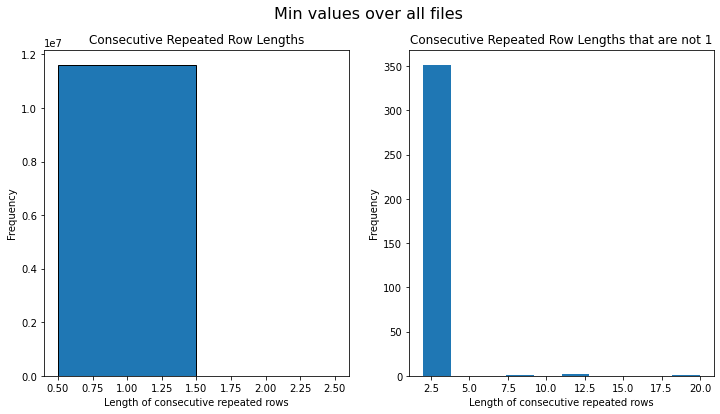

In [46]:

allStreaksLengths = np.array(allStreaksLengths)

print("Length of all Streaks = ",len(allStreaksLengths))
print("min repetition streak length = ", np.min(allStreaksLengths))
print("max repetition streak length = ",np.max(allStreaksLengths))
print("mean repetition streak length = ", np.mean(allStreaksLengths))

checkOther1 =   allStreaksLengths == 1
print("amount of streaks with other lengths than 1 = ", sum(~checkOther1))
print("percentage of streaks other than 1 = ", sum(~checkOther1) / len(allStreaksLengths))
check2 =   allStreaksLengths == 2
print("amount of streaks with length 2 = ", sum(check2))
print("percentage of streaks with length 2 = ", sum(check2) / sum(~checkOther1))

print(allStreaksLengths[~check2 & ~checkOther1])

# Create a boxplot for these elements
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,6))

ax[0].hist(allStreaksLengths, bins=range(1, max(streak_lengths) + 2), edgecolor='black', align='left')
ax[0].set_title('Consecutive Repeated Row Lengths')
ax[0].set_xlabel('Length of consecutive repeated rows')
ax[0].set_ylabel('Frequency')

ax[1].hist(allStreaksLengths[~checkOther1])
ax[1].set_title('Consecutive Repeated Row Lengths that are not 1')
ax[1].set_xlabel('Length of consecutive repeated rows')
ax[1].set_ylabel('Frequency')

f.suptitle('Min values over all files', fontsize=16)


# Save the plot to the specified directory
save_file = os.path.join(savepath, 'Histogram_consecutiveRepeatedRows.png')
plt.savefig(save_file, format='png')



plt.show()

## test removal and impact on sampling rate

In [8]:
def removeDuplicates(dataframe):

    # remove rows based on duplicates in the unity and eye tracking variables
    
    eyeUnityComb = dataframe.columns[10:37]
    # check if vars are correctly selected
    for column_name in enumerate(eyeUnityComb):
        print(column_name)
    
    
    # Check if differences between consecutive rows are consistently 0 for the selected columns

    # first create df with differences within each column - compare each row with the next
    diffDF = dataframe[eyeUnityComb].diff()

    # then check, if there are 0 differences (doublicates) in all columns
    repeatedRows = diffDF.eq(0).all(axis=1)
    
    

    # Remove duplicate rows
    df_no_duplicates = dataframe[~repeatedRows]

    # Reset index of the new DataFrame
    df_no_duplicates.reset_index(drop=True, inplace=True)
    
    
    return df_no_duplicates
    

In [9]:
# test code
file= "1004_Session_2_ET_1_data_prepared.csv"
data = pd.read_csv(os.path.join(DATA_PATH, file))

# data = convertTimeStamp(data)
dataNew = removeDuplicates(data)



(0, 'eyePositionCombinedWorld_x')
(1, 'eyePositionCombinedWorld_y')
(2, 'eyePositionCombinedWorld_z')
(3, 'eyeDirectionCombinedWorld_x')
(4, 'eyeDirectionCombinedWorld_y')
(5, 'eyeDirectionCombinedWorld_z')
(6, 'eyeDirectionCombinedLocal_x')
(7, 'eyeDirectionCombinedLocal_y')
(8, 'eyeDirectionCombinedLocal_z')
(9, 'eyePositionLeftWorld_x')
(10, 'eyePositionLeftWorld_y')
(11, 'eyePositionLeftWorld_z')
(12, 'eyeDirectionLeftWorld_x')
(13, 'eyeDirectionLeftWorld_y')
(14, 'eyeDirectionLeftWorld_z')
(15, 'eyeDirectionLeftLocal_x')
(16, 'eyeDirectionLeftLocal_y')
(17, 'eyeDirectionLeftLocal_z')
(18, 'eyePositionRightWorld_x')
(19, 'eyePositionRightWorld_y')
(20, 'eyePositionRightWorld_z')
(21, 'eyeDirectionRightWorld_x')
(22, 'eyeDirectionRightWorld_y')
(23, 'eyeDirectionRightWorld_z')
(24, 'eyeDirectionRightLocal_x')
(25, 'eyeDirectionRightLocal_y')
(26, 'eyeDirectionRightLocal_z')


68703
39089
---------------------------------
max sampling rate 1  403.2596865685992
max sampling rate 2  223.72007680819289
---------------------------------
mean sampling rate 1  114.46361446333545
mean sampling rate 2  65.1243919814048
---------------------------------
median sampling rate 1  125.94372879320181
median sampling rate 2  87.64243475353658
---------------------------------


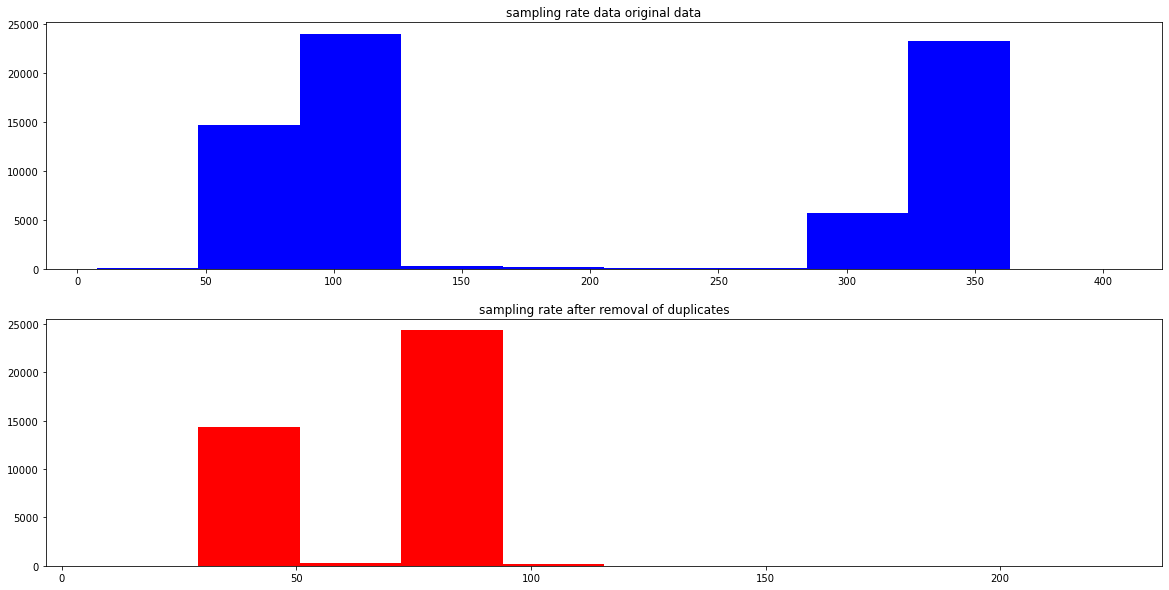

In [10]:
print(len(data))
print(len(dataNew))

samplingRate1 = data['timeStampDataPointStart'].diff()
samplingRate2 = dataNew['timeStampDataPointStart'].diff()

print("---------------------------------")

print("max sampling rate 1 ", 1/np.nanmin(samplingRate1))
print("max sampling rate 2 ", 1/np.nanmin(samplingRate2))
print("---------------------------------")

print("mean sampling rate 1 ", 1/np.nanmean(samplingRate1))
print("mean sampling rate 2 ", 1/np.nanmean(samplingRate2))
print("---------------------------------")

print("median sampling rate 1 ", 1/np.nanmedian(samplingRate1))
print("median sampling rate 2 ", 1/np.nanmedian(samplingRate2))

print("---------------------------------")



fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20, 10))

axes[0].hist(1/samplingRate1, color='blue')
axes[0].set_title('sampling rate data original data')


axes[1].hist(1/samplingRate2, color= 'red')

axes[1].set_title('sampling rate after removal of duplicates')

save_file = os.path.join(savepath, 'SamplingRate_1004_Session_2_ET_1_data.png')
plt.savefig(save_file, format='png')
